In [13]:
import pandas as pd

In [8]:
from ml_pilot.feature_engineering import feature_engineering

In [11]:
feature_engineering.drop_features(df,["ApplicantIncome"])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
626,LP001028,Male,Yes,2,Graduate,No,8106.0,200.0,360.0,1.0,Urban,Y
627,LP001029,Male,No,0,Graduate,No,2840.0,114.0,360.0,1.0,Rural,N
628,LP001030,Male,Yes,2,Graduate,No,1086.0,17.0,120.0,1.0,Urban,Y
629,LP001032,Male,No,0,Graduate,No,0.0,125.0,360.0,1.0,Urban,Y


In [10]:
from custom_pkg_dmo.package1 import arithmetic as arith
from custom_pkg_dmo.package2 import bitcompare as bits
from custom_pkg_dmo.package2 import comparison as comp

In [11]:
arith.myadd(12234,2323)

14557

In [12]:
import sys
#sys.path.append('C:/Users/Zee Tech/AppData/Local/Programs/Python/Python39/Scripts/custom_package')

In [2]:
import module1 as m1
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('LoanDatasets.csv')

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


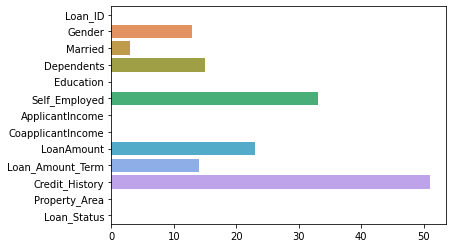

In [7]:
m1.null_summary(df)

In [8]:
import imp

In [9]:
imp.reload(module1)

NameError: name 'module1' is not defined

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

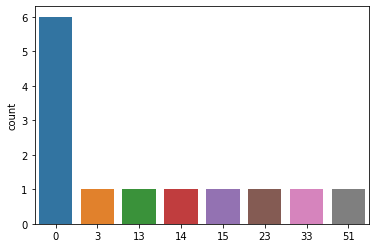

In [10]:
sns.countplot(df.isnull().sum())

In [11]:
nulls=df.isnull().sum()

In [12]:
type(nulls)

pandas.core.series.Series

In [13]:
nulls.index

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
nulls.values

array([ 0, 13,  3, 15,  0, 33,  0,  0, 23, 14, 51,  0,  0], dtype=int64)

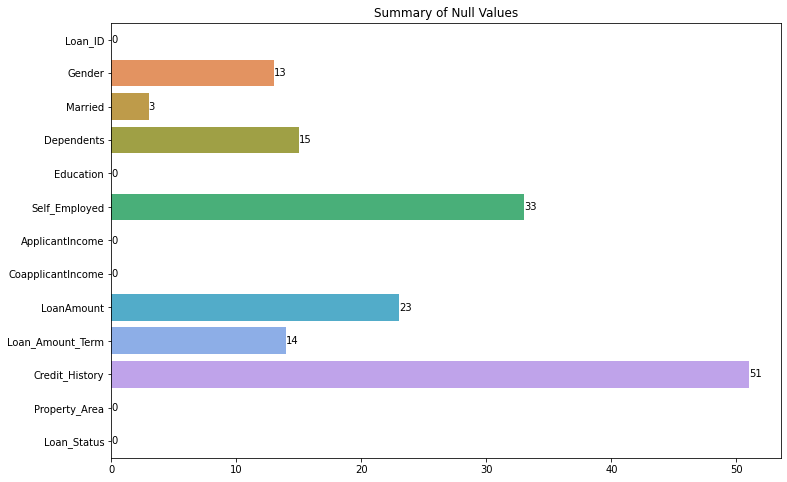

In [24]:
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=nulls.values,y=nulls.index)
for container in ax.containers:
    ax.bar_label(container)
ax.set(title="Summary of Null Values")
plt.show()

In [41]:
def null_percent(data_frame,limit):
    nulls_percent=data_frame.isnull().sum()/data_frame.shape[0]*100
    return nulls_percent[nulls_percent<=limit]

In [42]:
null_percent(df,2)

Loan_ID              0.000000
Married              0.475436
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [92]:
def drop_features(data_frame,features,criteria=None,inplace=False):
    if inplace==True and criteria==None:
        return data_frame.drop(features,axis=1,inplace=True)
    elif inplace==True and criteria=="nan":
        nulls=data_frame.isnull().sum()/data_frame.shape[0]*100
        return data_frame.drop(nulls[nulls>=30].index,axis=1,inplace=True)
    elif inplace==False and criteria==None:
        return data_frame.drop(features,axis=1)
    else:
        return data_frame.drop(features,axis=1)
    

In [94]:
drop_features(df,[],inplace=True)

In [95]:
def features_summary(df):

IndentationError: expected an indented block (<ipython-input-95-4b7a1955895b>, line 1)

In [127]:
# Function to perform all EDA
def data_summary(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"Data Summary")
    print(f"Size {df.size}")
    print(f"Features {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*100)

    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")
    
    print("="*100)
    
    # Printing the Categorical columns
    print("Dataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    print("="*100)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*100)
    
    # Displaying correlation of numerical features
    corr = df.corr(method="kendall").style.background_gradient("YlOrRd_r")
    print("Correlation of Numerical features....")
    display(corr)
    


In [128]:
perform_eda(df)

Data Summary
Size 6941
Features 11
Records 631
Dataset has following Numerical columns...
 1) ApplicantIncome
 2) CoapplicantIncome
 3) LoanAmount
 4) Loan_Amount_Term
 5) Credit_History
Dataset has following Categorical columns...
 1) Loan_ID
 2) Married
 3) Dependents
 4) Self_Employed
 5) Property_Area
 6) Loan_Status
Statistical Properties of Data....


,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,631,628,616,598,631.000000,631.000000,608.000000,617.000000,580.000000,631,631
unique,614,2,4,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001020,Yes,0,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,2,410,352,514,NaN,NaN,NaN,NaN,NaN,235,435
mean,NaN,NaN,NaN,NaN,5369.006339,1639.608431,146.222039,341.912480,0.844828,NaN,NaN
std,NaN,NaN,NaN,NaN,6044.222376,2928.261812,85.391289,65.026259,0.362381,NaN,NaN
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2875.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3800.000000,1213.000000,127.500000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5763.000000,2318.000000,168.000000,360.000000,1.000000,NaN,NaN


Correlation of Numerical features....


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.227468,0.374156,-0.025879,0.034664
CoapplicantIncome,-0.227468,1.000000,0.193762,-0.006069,-0.007487
LoanAmount,0.374156,0.193762,1.000000,0.041545,-0.005159
Loan_Amount_Term,-0.025879,-0.006069,0.041545,1.000000,0.014081
Credit_History,0.034664,-0.007487,-0.005159,0.014081,1.000000


In [61]:
def features_summary(data_frame):
    # Getting Numerical and Categorical columns Separately
    num_cols = df.select_dtypes(np.number).columns
    for feature_name in num_cols:
        print(f"Exploring {str(feature_name).upper()}........")
        print(f"Mean of {feature_name}     : {data_frame[feature_name].mean()}")
        print(f"Median of {feature_name}   : {data_frame[feature_name].median()}")
        print(f"Mode of {feature_name}     : {data_frame[feature_name].mode()}")
        print(f"Variance of {feature_name} : {data_frame[feature_name].var()}")
        print(f"Skewness of {feature_name} : {data_frame[feature_name].skew()}")
        print(f"Maximum of {feature_name}  : {data_frame[feature_name].max()}")
        print(f"Minimum of {feature_name}  : {data_frame[feature_name].min()}")
        # Drawing plots
        plt.figure(figsize=(17, 4))
        fig=plt.figure(figsize=(17, 4))
        plt.subplot(131)
        sns.kdeplot(data_frame[feature_name])
        #boxplots
        plt.subplot(132)
        sns.boxplot(data_frame[feature_name])
  

Exploring APPLICANTINCOME........
Mean of ApplicantIncome     : 5369.006339144215
Median of ApplicantIncome   : 3800.0
Mode of ApplicantIncome     : 0    2500
dtype: int64
Variance of ApplicantIncome : 36532624.130118474
Skewness of ApplicantIncome : 6.587714782914286
Maximum of ApplicantIncome  : 81000
Minimum of ApplicantIncome  : 150
Exploring COAPPLICANTINCOME........
Mean of CoapplicantIncome     : 1639.6084310438032
Median of CoapplicantIncome   : 1213.0
Mode of CoapplicantIncome     : 0    0.0
dtype: float64
Variance of CoapplicantIncome : 8574717.241521861
Skewness of CoapplicantIncome : 7.323773218437848
Maximum of CoapplicantIncome  : 41667.0
Minimum of CoapplicantIncome  : 0.0
Exploring LOANAMOUNT........
Mean of LoanAmount     : 146.22203947368422
Median of LoanAmount   : 127.5
Mode of LoanAmount     : 0    120.0
dtype: float64
Variance of LoanAmount : 7291.672198799097
Skewness of LoanAmount : 2.649337841192837
Maximum of LoanAmount  : 700.0
Minimum of LoanAmount  : 9.0


c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

Exploring LOAN_AMOUNT_TERM........
Mean of Loan_Amount_Term     : 341.91247974068074
Median of Loan_Amount_Term   : 360.0
Mode of Loan_Amount_Term     : 0    360.0
dtype: float64
Variance of Loan_Amount_Term : 4228.414405691554
Skewness of Loan_Amount_Term : -2.373521591211365
Maximum of Loan_Amount_Term  : 480.0
Minimum of Loan_Amount_Term  : 12.0
Exploring CREDIT_HISTORY........
Mean of Credit_History     : 0.8448275862068966
Median of Credit_History   : 1.0
Mode of Credit_History     : 0    1.0
dtype: float64
Variance of Credit_History : 0.13132035018760052
Skewness of Credit_History : -1.9097043476578266
Maximum of Credit_History  : 1.0
Minimum of Credit_History  : 0.0


c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1224x288 with 0 Axes>

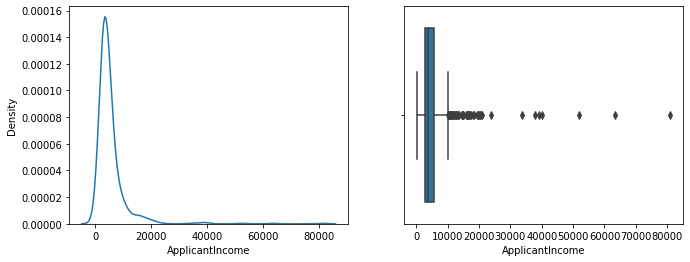

<Figure size 1224x288 with 0 Axes>

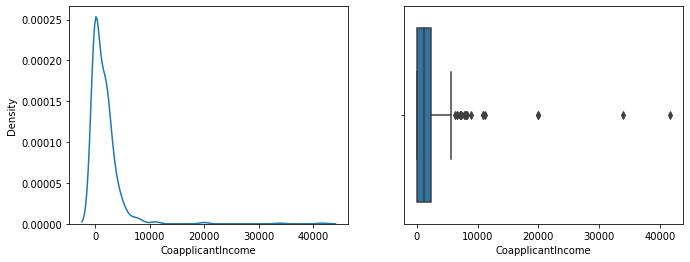

<Figure size 1224x288 with 0 Axes>

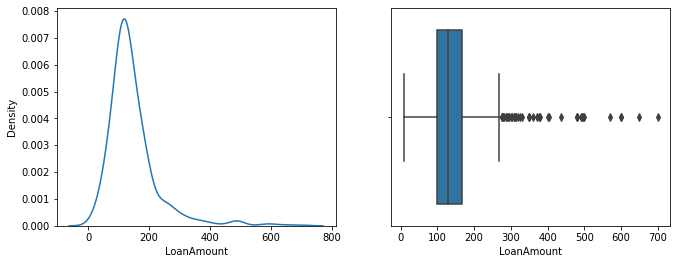

<Figure size 1224x288 with 0 Axes>

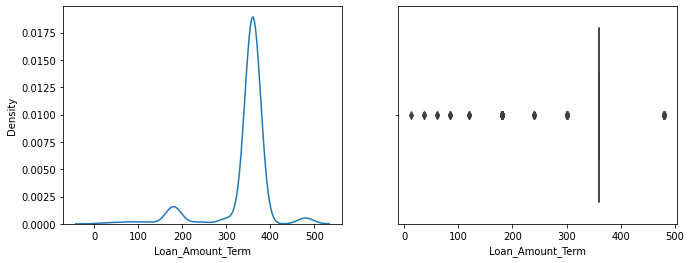

<Figure size 1224x288 with 0 Axes>

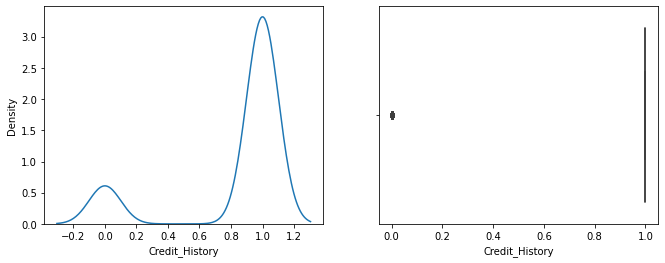

In [62]:
features_summary(df)

In [39]:
# Function to explore continous features
def explore_feature(feature_name):
    # Printing details
    print(f"Exploring {str(feature_name).upper()}........")
    print(f"Mean of {feature_name}     : {df[feature_name].mean()}")
    print(f"Median of {feature_name}   : {df[feature_name].median()}")
    print(f"Mode of {feature_name}     : {df[feature_name].mode()}")
    print(f"Variance of {feature_name} : {df[feature_name].var()}")
    print(f"Skewness of {feature_name} : {df[feature_name].skew()}")
    print(f"Maximum of {feature_name}  : {df[feature_name].max()}")
    print(f"Minimum of {feature_name}  : {df[feature_name].min()}")
    
    # Drawing plots
    plt.figure(figsize=(17, 4))
    fig=plt.figure(figsize=(17, 4))
    plt.subplot(131)
    sns.kdeplot(df[feature_name])
    
    #boxplots
    plt.subplot(132)
    sns.boxplot(df[feature_name])

Exploring APPLICANTINCOME........
Mean of ApplicantIncome     : 5369.006339144215
Median of ApplicantIncome   : 3800.0
Mode of ApplicantIncome     : 0    2500
dtype: int64
Variance of ApplicantIncome : 36532624.130118474
Skewness of ApplicantIncome : 6.587714782914286
Maximum of ApplicantIncome  : 81000
Minimum of ApplicantIncome  : 150


c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1224x288 with 0 Axes>

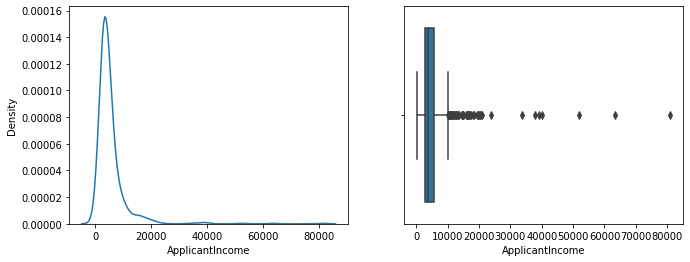

In [40]:
explore_feature("ApplicantIncome")

In [16]:
def features_summary(data_frame):
    # Getting Numerical and Categorical columns Separately
    num_cols = data_frame.select_dtypes(np.number).columns
    for feature_name in num_cols:
        print(f"Exploring {str(feature_name).upper()}........")
        print(f"Mean of {feature_name}     : {data_frame[feature_name].mean()}")
        print(f"Median of {feature_name}   : {data_frame[feature_name].median()}")
        print(f"Mode of {feature_name}     : {data_frame[feature_name].mode()}")
        print(f"Variance of {feature_name} : {data_frame[feature_name].var()}")
        print(f"Skewness of {feature_name} : {data_frame[feature_name].skew()}")
        print(f"Maximum of {feature_name}  : {data_frame[feature_name].max()}")
        print(f"Minimum of {feature_name}  : {data_frame[feature_name].min()}")
        # Drawing plots
        plt.figure(figsize=(17, 4))
        fig=plt.figure(figsize=(17, 4))
        plt.subplot(131)
        sns.kdeplot(data_frame[feature_name])
        #boxplots
        plt.subplot(132)
        sns.boxplot(data_frame[feature_name])

Exploring APPLICANTINCOME........
Mean of ApplicantIncome     : 5369.006339144215
Median of ApplicantIncome   : 3800.0
Mode of ApplicantIncome     : 0    2500
dtype: int64
Variance of ApplicantIncome : 36532624.130118474
Skewness of ApplicantIncome : 6.587714782914286
Maximum of ApplicantIncome  : 81000
Minimum of ApplicantIncome  : 150


c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

Exploring COAPPLICANTINCOME........
Mean of CoapplicantIncome     : 1639.6084310438032
Median of CoapplicantIncome   : 1213.0
Mode of CoapplicantIncome     : 0    0.0
dtype: float64
Variance of CoapplicantIncome : 8574717.241521861
Skewness of CoapplicantIncome : 7.323773218437848
Maximum of CoapplicantIncome  : 41667.0
Minimum of CoapplicantIncome  : 0.0
Exploring LOANAMOUNT........
Mean of LoanAmount     : 146.22203947368422
Median of LoanAmount   : 127.5
Mode of LoanAmount     : 0    120.0
dtype: float64
Variance of LoanAmount : 7291.672198799097
Skewness of LoanAmount : 2.649337841192837
Maximum of LoanAmount  : 700.0
Minimum of LoanAmount  : 9.0
Exploring LOAN_AMOUNT_TERM........
Mean of Loan_Amount_Term     : 341.91247974068074
Median of Loan_Amount_Term   : 360.0
Mode of Loan_Amount_Term     : 0    360.0
dtype: float64
Variance of Loan_Amount_Term : 4228.414405691554
Skewness of Loan_Amount_Term : -2.373521591211365
Maximum of Loan_Amount_Term  : 480.0
Minimum of Loan_Amount_Ter

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1224x288 with 0 Axes>

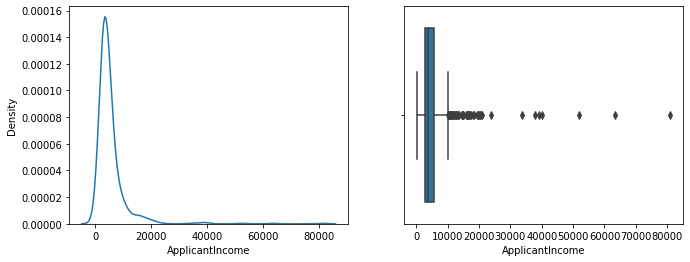

<Figure size 1224x288 with 0 Axes>

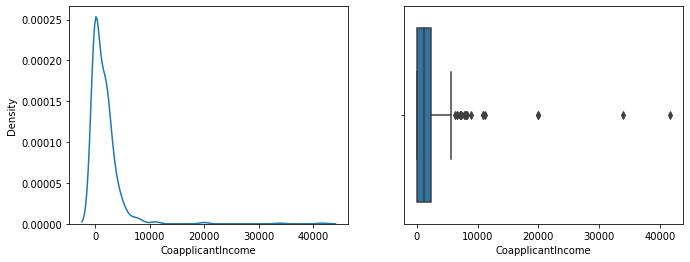

<Figure size 1224x288 with 0 Axes>

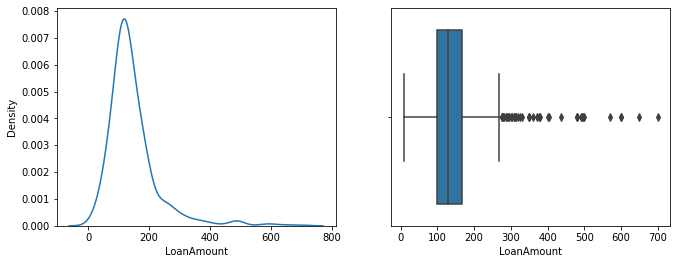

<Figure size 1224x288 with 0 Axes>

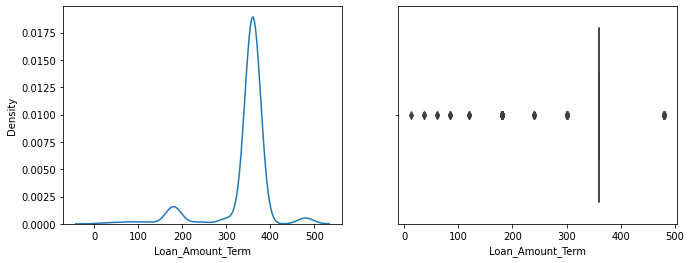

<Figure size 1224x288 with 0 Axes>

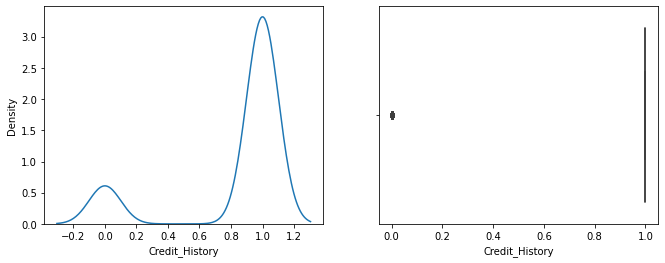

In [17]:
features_summary(df)

In [21]:
def null_percent(data_frame,limit):
    '''
    this function returns the feature that contains percentage 
    of null values greater than equal to limit
    '''
    nulls_percent=data_frame.isnull().sum()/data_frame.shape[0]*100
    return nulls_percent[nulls_percent>=limit]

In [22]:
null_percent(df,2)

Gender              2.060222
Dependents          2.377179
Self_Employed       5.229794
LoanAmount          3.645008
Loan_Amount_Term    2.218700
Credit_History      8.082409
dtype: float64

In [23]:
import eda

In [26]:
eda.null_percent(df,2)

Gender              2.060222
Dependents          2.377179
Self_Employed       5.229794
LoanAmount          3.645008
Loan_Amount_Term    2.218700
Credit_History      8.082409
dtype: float64